># Comparación de los modelos empleados y los modelos de ScikitLearn

## Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

Modelos de scikitLearn

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDClassifier

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.base import clone

## Clases y Funciones

Definimos la clase Regresion

In [ ]:
class Regresion:

  def __init__(self,tipo,x,y):
    self.tipo = tipo
    self.columnas_entrada = x
    self.columna_salida = y
    self.min = 0
    self.max = 0

# Funciones Fit, validar, Predict

  def fit(self, data, train = 0.7 , iter = 200, ratio = 0.1, seed = 1):

    # Seleccionamos los datos
    data = data[self.columnas_entrada + self.columna_salida]

    # Dividimos y Normalizamos
    self.exp = self.division_datos(train,data,seed)
    self.exp[0], self.min, self.max = self.Normalizar_entrenamiento(self.exp[0])
    self.exp[1] = self.Normalizar(self.exp[1], self.min, self.max)

    X = self.exp[0][self.columnas_entrada]
    Y = self.exp[0][self.columna_salida]

    # Seleccionamos el algoritmo de regresion
    if self.tipo == 'M':
      self.theta = self.Reg_Matrix(X, Y)
    elif self.tipo in ['L' ,'Log']:
      self.theta = self.Regresion_lineal(X, Y, iter, ratio)
    else:
      print("Valor invalido")

  def validar(self, delta = 0.5):

    X = self.exp[1][self.columnas_entrada]
    Y = self.exp[1][self.columna_salida]

    predict_Y = self.predict(X)
    if self.tipo == 'Log':
      predict_Y = self.decision(predict_Y, delta)

    return self.ECM(predict_Y, Y)

  def predict (self,datos):
    datos_ = datos.copy()
    datos_.insert(0, 'x0', 1)
    return self.h0(self.theta,datos_)

# Modelos de regresion

  def Reg_Matrix(self, x_, y):
    x = x_.copy()
    x.insert(0, 'x0', 1)
    theta = np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),y)
    return theta

  def Regresion_lineal(self, columnas_entrada, columna_salida, iteraciones, aprendizaje):

    # Seteamos algunos parametros iniciales
    variables = columnas_entrada.shape[1] + 1
    theta = np.zeros(variables).reshape(variables,1) # Se le agrega el x0 = 1
    cantidad_datos = columnas_entrada.shape[0]
    y = columna_salida.values
    x = columnas_entrada.copy()
    x.insert(0, 'x0', 1)
    x = x.values
    print(x)
    print(y)
    print(theta)
    # Realizamos el entrenamiento

    while iteraciones:
      iteraciones -= 1

      # Entrenamos cada theta
      for O in range(theta.shape[0]):
        costo = sum( (self.h0(theta,x)-y) * x[:,O].reshape(-1,1))
        theta[O] -= aprendizaje / cantidad_datos * costo

    return theta.reshape(variables,1)

# Funciones auxiliares

  def decision(self, Y_pred, delta):
    for i in range(Y_pred.shape[0]):
        Y_pred[i] = Y_pred[i] > delta
    return Y_pred

  def h0(self,x,theta):
    if self.tipo == 'Log':
      return 1 / ( 1 + np.exp(-(np.dot(theta,x))))
    return np.dot(theta,x)

  def division_datos(self, entrenamiento, data, seed = 1):
    entrenamiento = int(entrenamiento*len(data))
    prueba = len(data) - entrenamiento

    entrenamiento = data.sample(n=entrenamiento, random_state = seed)
    prueba = data.drop(entrenamiento.index)

    return [entrenamiento,prueba]

  def Normalizar_entrenamiento(self, datos):
    min = datos.min().min()
    max = datos.max().max()
    datos = (datos - min) / (max - min)
    return datos, min, max

  def Normalizar(self, datos, min, max):
    return (datos - min) / (max - min)

  def ECM (self, Y_test,predic):
    return ((Y_test - predic) ** 2).mean().values[0]

  def show(self):
    X = self.exp[1][self.columnas_entrada]
    Y = self.exp[1][self.columna_salida]

    predict_Y = self.predict(X)
    if self.tipo == 'Log':
      predict_Y = self.decision(predict_Y, 0.5)
    plt.scatter(X.values[:,0],Y)
    plt.scatter(X.values[:,0],predict_Y,color='red')
    plt.show()

In [ ]:
def ECM (Y_test,predic):
  return ((Y_test - predic) ** 2).mean()[0]

In [ ]:
def Normalizar_entrenamiento(datos):
  min = datos.min().min()
  max = datos.max().max()
  datos = (datos - min) / (max - min)
  return datos, min, max

In [ ]:
def Normalizar(datos, min, max):
  return (datos - min) / (max - min)

In [ ]:
def division_datos(entrenamiento, data, seed = 1):
  entrenamiento = int(entrenamiento*len(data))
  prueba = len(data) - entrenamiento

  entrenamiento = data.sample(n=entrenamiento, random_state = seed)
  prueba = data.drop(entrenamiento.index)

  return [entrenamiento,prueba]

## Obtenemos los datos

Datos necesarios para la regresion lineal, polinomial y logistica

In [ ]:
archivo1 = pd.read_csv("/content/house.csv")
archivo2 = pd.read_csv("/content/publicity_in_media.csv")
archivo3 = pd.read_csv("/content/survey lung cancer.csv")

data1 = archivo1
data2 = archivo2
data3 = archivo3

## Análisis de datos

 >###  Datos del modelo lineal

Vemos los tipos de datos y los datos vacios





In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4045 entries, 0 to 4044
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedroom_count    4045 non-null   int64  
 1   net_sqm          4045 non-null   float64
 2   center_distance  4045 non-null   float64
 3   metro_distance   4045 non-null   float64
 4   floor            4045 non-null   int64  
 5   age              4045 non-null   int64  
 6   price            4045 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 221.3 KB


Para los datos de entrada del modelo lineal usamos las dos columnas que presentan mayor correlación con respecto a la columna de salida.

In [ ]:
data1.corr()['price'].sort_values(ascending=False)

price              1.000000
net_sqm            0.734947
bedroom_count      0.568127
floor             -0.093950
metro_distance    -0.191751
age               -0.219934
center_distance   -0.472169
Name: price, dtype: float64

En este caso deseamos predecir el precio de la casa con respecto a los metros cuadrados que tiene la casa y la cantidad de cuartos

In [ ]:
X_Lineal = ['net_sqm','bedroom_count']
Y_Lineal = ['price']

In [ ]:
'''
features = 5
corr = abs(datos.corr()['diagnosis']).sort_values(ascending=False)
procs_data = datos[corr[1:features+1].index]
procs_data.values
'''

"\nfeatures = 5\ncorr = abs(datos.corr()['diagnosis']).sort_values(ascending=False)\nprocs_data = datos[corr[1:features+1].index]\nprocs_data.values\n"

Revisamos los rangos de los datos

In [ ]:
data1[X_Lineal+Y_Lineal].describe()

,net_sqm,bedroom_count,price
count,4045.000000,4045.000000,4045.000000
mean,111.628225,3.649691,95733.956499
std,89.459307,2.465720,3770.581749
min,-8.499109,1.000000,84153.485790
25%,50.168622,2.000000,93199.037388
50%,86.381463,3.000000,95474.254973
75%,144.767416,5.000000,97863.622299
max,750.971604,17.000000,118134.771190


Descartamos los datos erroneos, en este caso no pueden haber casas con metros cuadrados negativos.

In [ ]:
data1 = data1[data1['net_sqm']>1]

>### Datos del modelo polinomial

Vemos los tipos de datos



In [ ]:
data2.info()

NameError: ignored

Para los datos de entrada del modelo polinomial usamos la columna que presenta un comportamiento no lineal

In [ ]:
data2.corr()['ventas'].sort_values(ascending=False)

In [ ]:
plt.scatter(data2['tv'], data2['ventas'])

Pasamos el comportamiento polinomial a uno lineal

In [ ]:
datos = data2['tv'].values.copy()
for i in range(datos.shape[0]):
  datos[i] = math.sqrt(datos[i])
data2['tv2'] = datos

En este caso deseamos predecir la cantidad de ventas del producto con respecto a la cantidad de publicidad realizada en la televisión

In [ ]:
X_Poli = ['tv2']
Y_Poli = ['ventas']

Revisamos los rangos de los datos

In [ ]:
data2[X_Poli+Y_Poli].describe()

>### Datos del modelo Logistico

Vemos los tipos de datos y los datos vacios

In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

Convertimos los datos categoricos

In [ ]:
data3['LUNG_CANCER'] = data3['LUNG_CANCER'].replace({'YES': 2, 'NO': 1})
data3['GENDER'] = data3['GENDER'].replace({'M': 2, 'F': 1})

Para los datos de entrada del modelo logistico seleccionamos las columnas que presentaron mejores resultados, ya que visualmente no se tiene una separación clara. Por ello usamos los datos del experimento realizado en el trabajo previo.

In [ ]:
X_Log = ["FATIGUE ", "PEER_PRESSURE"]
Y_Log = ["LUNG_CANCER"]

## División y Normalización de datos

In [ ]:
data1 = data1[X_Lineal + Y_Lineal]
data2 = data2[X_Poli + Y_Poli]
data3 = data3[X_Log + Y_Log]

In [ ]:
data_Lineal_train, data_Lineal_test = division_datos(0.7,data1)
data_Poli_train, data_Poli_test = division_datos(0.7,data2)
data_Log_train, data_Log_test = division_datos(0.7,data3)

In [ ]:
data_Lineal_train, min1, max1 = Normalizar_entrenamiento(data_Lineal_train)
data_Poli_train, min2, max2 = Normalizar_entrenamiento(data_Poli_train)
data_Log_train, min3, max3 = Normalizar_entrenamiento(data_Log_train)

In [ ]:
data_Lineal_test = Normalizar(data_Lineal_test, min1, max1)
data_Poli_test = Normalizar(data_Poli_test, min2, max2)
data_Log_test = Normalizar(data_Log_test, min3, max3)

In [ ]:
X_L_E = data_Lineal_train[X_Lineal]
X_L_T = data_Lineal_test[X_Lineal]
Y_L_E = data_Lineal_train[Y_Lineal]
Y_L_T = data_Lineal_test[Y_Lineal]

In [ ]:
X_P_E = data_Poli_train[X_Poli]
X_P_T = data_Poli_test[X_Poli]
Y_P_E = data_Poli_train[Y_Poli]
Y_P_T = data_Poli_test[Y_Poli]

In [ ]:
X_Lg_E = data_Log_train[X_Log]
X_Lg_T = data_Log_test[X_Log]
Y_Lg_E = data_Log_train[Y_Log]
Y_Lg_T = data_Log_test[Y_Log]

## Experimento

>### Modelos Lineales

Resultado del modelo lineal iterativo

In [ ]:
modelo = Regresion('L', X_Lineal, Y_Lineal)
modelo.fit(data1,0.7)
Res_Lineal_Iter = modelo.validar()

[[1.00000000e+00 9.73971584e-04 4.23248996e-05]
 [1.00000000e+00 1.02730088e-03 1.69299598e-05]
 [1.00000000e+00 1.23608721e-03 4.23248996e-05]
 ...
 [1.00000000e+00 1.53468648e-03 2.53949397e-05]
 [1.00000000e+00 2.05684913e-03 4.23248996e-05]
 [1.00000000e+00 8.39097562e-04 3.38599196e-05]]
[[0.85272529]
 [0.83501044]
 [0.84126547]
 ...
 [0.82410803]
 [0.86933083]
 [0.81600481]]
[[0.]
 [0.]
 [0.]]


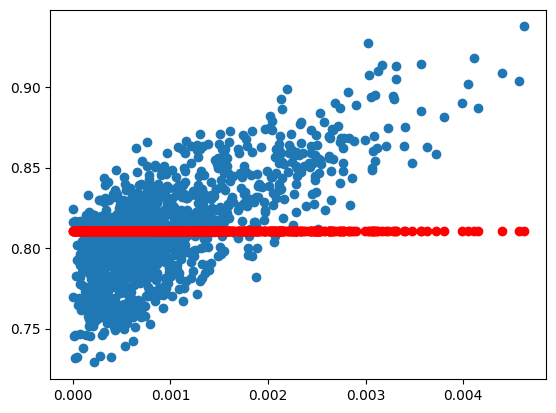

In [ ]:
modelo.show()

Resultado del modelo lineal matricial

In [ ]:
modelo = Regresion('M', X_Lineal, Y_Lineal)
modelo.fit(data1,0.7)
Res_Lineal_Mx = modelo.validar()

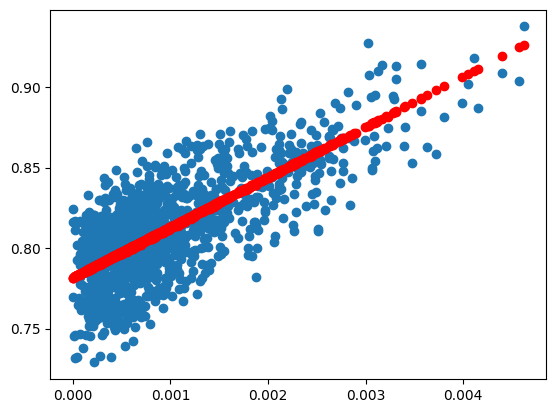

In [ ]:
modelo.show()

Modelos de scikitlearn

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_L_E, Y_L_E)
Y_predic = lin_reg.predict(X_L_T)
Res_Lineal_skLin = ECM(Y_L_T, Y_predic)

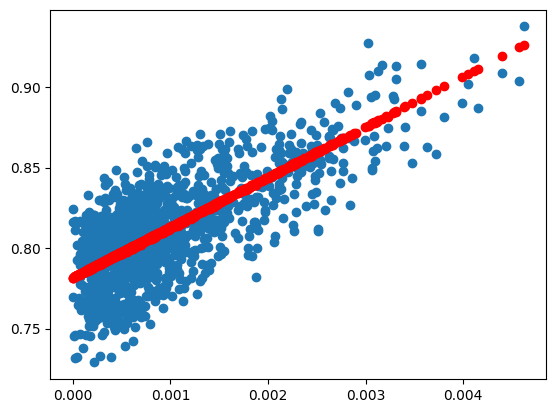

In [ ]:
plt.scatter(X_L_T.values[:,0],Y_L_T)
plt.scatter(X_L_T.values[:,0],Y_predic,color='red')
plt.show()

In [ ]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_L_E, Y_L_E)
Y_predic = tree_reg.predict(X_L_T)
Y_predic = Y_predic.reshape(Y_predic.shape[0],1)
Res_Lineal_skTree = ECM(Y_L_T, Y_predic)

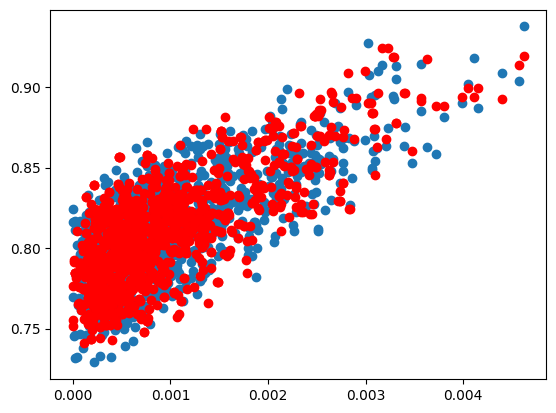

In [ ]:
plt.scatter(X_L_T.values[:,0],Y_L_T)
plt.scatter(X_L_T.values[:,0],Y_predic,color='red')
plt.show()

In [ ]:
svm_reg = SVR(kernel="linear")
svm_reg.fit(X_L_E.values, Y_L_E.values)
Y_predic = svm_reg.predict(X_L_T)
Y_predic = Y_predic.reshape(Y_predic.shape[0],1)
Res_Lineal_skSVR = ECM(Y_L_T, Y_predic)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


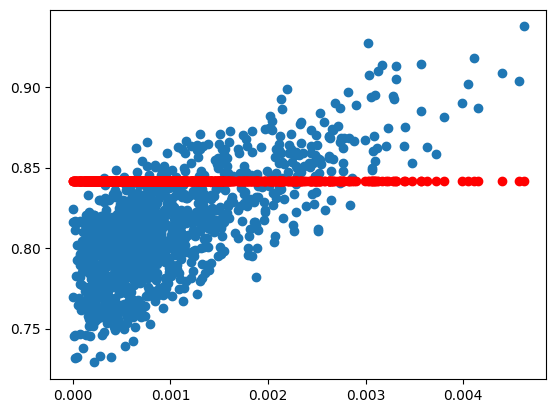

In [ ]:
plt.scatter(X_L_T.values[:,0],Y_L_T)
plt.scatter(X_L_T.values[:,0],Y_predic,color='red')
plt.show()

In [ ]:
print(Res_Lineal_Iter,"","Modelo iterativo")
print(Res_Lineal_Mx,"","Modelo matricial")
print(Res_Lineal_skLin,"","Modelo lineal de skl")
print(Res_Lineal_skTree,"","Arbol de decision de skl")
print(Res_Lineal_skSVR,"","Modelo SVR de skl")

0.0010412641501739508  Modelo iterativo
0.0004908898075831478  Modelo matricial
0.0004908898075831478  Modelo lineal de skl
0.0009799034105841492  Arbol de decision de skl
0.002036359132035977  Modelo SVR de skl


>### Modelos Polinomiales

In [ ]:
modelo = Regresion('L', X_Poli, Y_Poli)
modelo.fit(data2,0.7)
Res_Poli_Iter = modelo.validar()

[[1.         0.53945155]
 [1.         0.52806884]
 [1.         0.35271292]
 [1.         0.62698823]
 [1.         0.59512831]
 [1.         0.63098029]
 [1.         0.47084606]
 [1.         0.4971557 ]
 [1.         0.29829354]
 [1.         0.54566362]
 [1.         0.47269387]
 [1.         0.29499245]
 [1.         0.54472261]
 [1.         0.38015062]
 [1.         0.55946823]
 [1.         0.40905264]
 [1.         0.41947953]
 [1.         0.63924021]
 [1.         0.16649953]
 [1.         0.53931576]
 [1.         0.36207061]
 [1.         0.29165778]
 [1.         0.16454181]
 [1.         0.37561051]
 [1.         0.38594212]
 [1.         0.50818338]
 [1.         0.2258535 ]
 [1.         0.58891042]
 [1.         0.47621675]
 [1.         0.57794047]
 [1.         0.57768597]
 [1.         0.57077391]
 [1.         0.44940986]
 [1.         0.4813803 ]
 [1.         0.58841031]
 [1.         0.50313302]
 [1.         0.55499084]
 [1.         0.41551121]
 [1.         0.54754105]
 [1.         0.14156372]


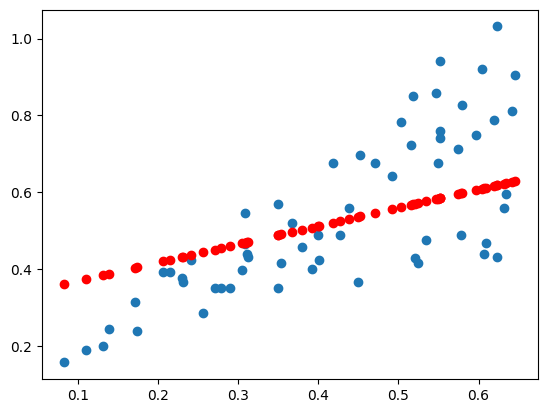

In [ ]:
modelo.show()

In [ ]:
modelo = Regresion('M', X_Poli, Y_Poli)
modelo.fit(data2,0.7)
Res_Poli_Mx = modelo.validar()

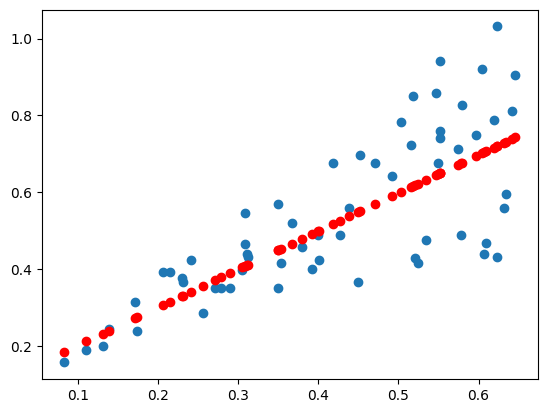

In [ ]:
modelo.show()

Modelos de scikitlearn

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_P_E, Y_P_E)
Y_predic = lin_reg.predict(X_P_T)
Res_Poli_skLin = ECM(Y_P_T, Y_predic)

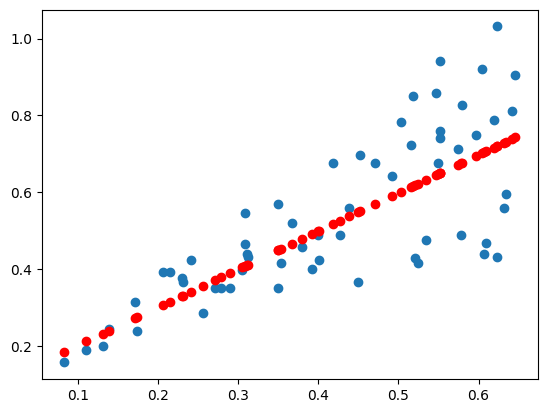

In [ ]:
plt.scatter(X_P_T.values[:,0],Y_P_T)
plt.scatter(X_P_T.values[:,0],Y_predic,color='red')
plt.show()

In [ ]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_P_E, Y_P_E)
Y_predic = tree_reg.predict(X_P_T)
Y_predic = Y_predic.reshape(Y_predic.shape[0],1)
Res_Poli_skTree = ECM(Y_P_T, Y_predic)

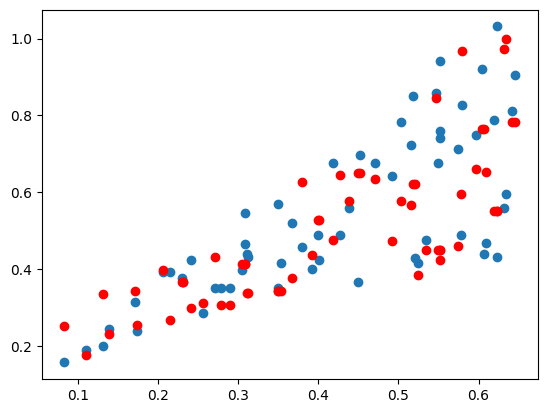

In [ ]:
plt.scatter(X_P_T.values[:,0],Y_P_T)
plt.scatter(X_P_T.values[:,0],Y_predic,color='red')
plt.show()

In [ ]:
svm_reg = SVR(kernel="linear")
svm_reg.fit(X_P_E, Y_P_E)
Y_predic = svm_reg.predict(X_P_T)
Y_predic = Y_predic.reshape(Y_predic.shape[0],1)
Res_Poli_skSVR = ECM(Y_P_T, Y_predic)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


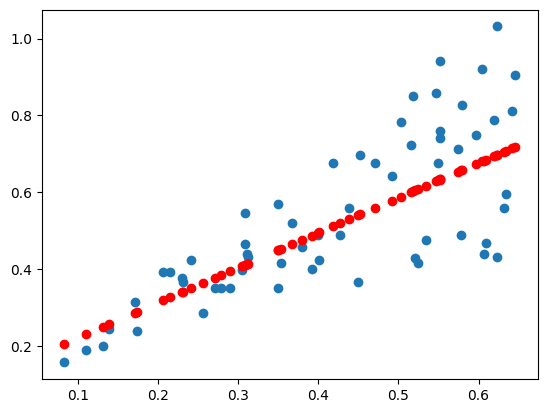

In [ ]:
plt.scatter(X_P_T.values[:,0],Y_P_T)
plt.scatter(X_P_T.values[:,0],Y_predic,color='red')
plt.show()

In [ ]:
print(Res_Poli_Iter,"","Modelo iterativo")
print(Res_Poli_Mx,"","Modelo matricial")
print(Res_Poli_skLin,"","Modelo lineal de skl")
print(Res_Poli_skTree,"","Arbol de decision de skl")
print(Res_Poli_skSVR,"","Modelo SVR de skl")

0.02457634083903956  Modelo iterativo
0.017592173754958137  Modelo matricial
0.017592173754958133  Modelo lineal de skl
0.03302948217047645  Arbol de decision de skl
0.01801989640669328  Modelo SVR de skl


>### Modelos Logisticos

In [ ]:
modelo = Regresion('Log', X_Log, Y_Log)
modelo.fit(data3,0.7)
Res_Log_RegLog = modelo.validar()

[[1. 1. 0.]
 [1. 0. 0.]
 [1. 1. 1.]
 [1. 0. 1.]
 [1. 1. 0.]
 [1. 1. 0.]
 [1. 1. 0.]
 [1. 1. 1.]
 [1. 1. 0.]
 [1. 0. 0.]
 [1. 0. 1.]
 [1. 1. 1.]
 [1. 1. 0.]
 [1. 1. 0.]
 [1. 0. 1.]
 [1. 0. 0.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 0.]
 [1. 1. 1.]
 [1. 0. 1.]
 [1. 0. 0.]
 [1. 1. 1.]
 [1. 1. 0.]
 [1. 0. 1.]
 [1. 1. 1.]
 [1. 1. 0.]
 [1. 1. 0.]
 [1. 1. 0.]
 [1. 1. 1.]
 [1. 0. 1.]
 [1. 1. 0.]
 [1. 1. 1.]
 [1. 1. 0.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 1. 1.]
 [1. 0. 0.]
 [1. 0. 1.]
 [1. 1. 1.]
 [1. 1. 0.]
 [1. 1. 1.]
 [1. 1. 0.]
 [1. 1. 0.]
 [1. 1. 0.]
 [1. 1. 1.]
 [1. 0. 0.]
 [1. 1. 1.]
 [1. 0. 0.]
 [1. 1. 0.]
 [1. 0. 0.]
 [1. 1. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 0.]
 [1. 0. 1.]
 [1. 0. 0.]
 [1. 1. 0.]
 [1. 0. 1.]
 [1. 0. 0.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 0.]
 [1. 0. 0.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 0. 0.]
 [1. 0. 1.]
 [1. 1. 0.]
 [1. 0. 0.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 1.]
 [1. 1. 0.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1.

Si tiene cancer es 1, si no tiene cancer es 0.
Por lo que 1 es nuestro positivo y 0 nuestro negativo

In [ ]:
pred = (modelo.decision(modelo.predict(X_Lg_T),.785)==Y_Lg_T).values.reshape(-1)
Y_Lg_Val = Y_Lg_T.values.reshape(-1)

TP = 0
FP = 0
FN = 0

for i in range(Y_Lg_Val.shape[0]):
  if pred[i] == True and Y_Lg_Val[i] == 1:
    TP += 1
  elif pred[i] == False and Y_Lg_Val[i] == 1:
    FP += 1
  elif pred[i] == False and Y_Lg_Val[i] == 0:
    FN += 1

accuracy = (TP+FP)/Y_Lg_Val.shape[0]
precision = TP/ (TP+FP)
recall = TP/ (TP+FN)
f1 = 2 * ((precision * recall) / (precision+recall))

In [ ]:
print("Resultados del modelo logístico")
print(" Precision:",round(precision,3))
print(" Accuracy: ",round(accuracy,3))
print(" Recall:   ",round(recall,3))
print(" F1:       ",round(f1,3))

Resultados del modelo logístico
 Precision: 0.87
 Accuracy:  0.828
 Recall:    0.87
 F1:        0.87


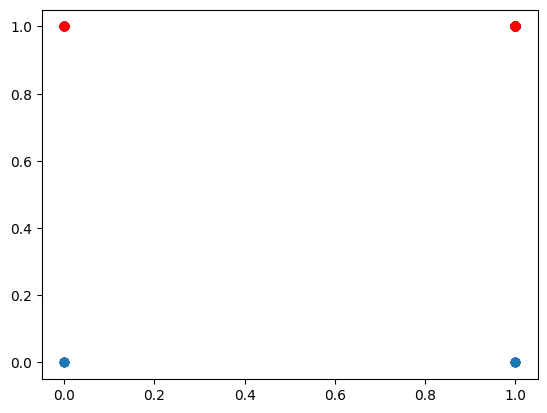

In [ ]:
modelo.show()

In [ ]:
log_reg = LogisticRegression(random_state=1)
log_reg.fit(X_Lg_E,Y_Lg_E)
Y_predic = log_reg.predict(X_Lg_T)
Y_predic = Y_predic.reshape(Y_predic.shape[0],1)
Res_Log_skLog = ECM(X_Lg_T, Y_predic)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


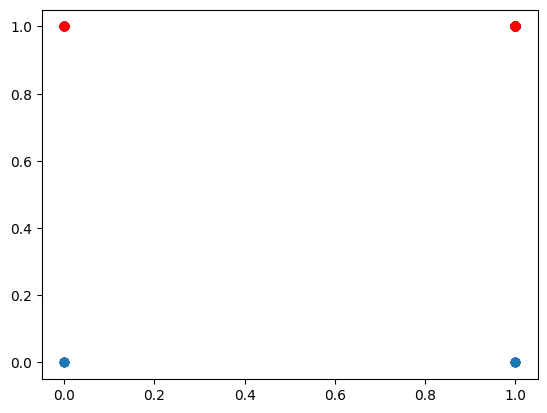

In [ ]:
plt.scatter(X_Lg_T.values[:,0],Y_Lg_T)
plt.scatter(X_Lg_T.values[:,0],Y_predic,color='red')
plt.show()

In [ ]:
precision = cross_val_score(log_reg, X_Lg_T, Y_Lg_T, cv=10, scoring="precision")
accuracy = cross_val_score(log_reg, X_Lg_T, Y_Lg_T, cv=10, scoring="accuracy")
recall = cross_val_score(log_reg, X_Lg_T, Y_Lg_T, cv=10, scoring="recall")
f1 = cross_val_score(log_reg, X_Lg_T, Y_Lg_T, cv=10, scoring="f1")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:
print("Resultados de la regresión logistica de Scikit Learn")
print(" Precision:",round(precision.mean(),3))
print(" Accuracy: ",round(accuracy.mean(),3))
print(" Recall:   ",round(recall.mean(),3))
print(" F1:       ",round(f1.mean(),3))

Resultados de la regresión logistica de Scikit Learn
 Precision: 0.829
 Accuracy:  0.829
 Recall:    1.0
 F1:        0.906


In [ ]:
sgd_clf = SGDClassifier(max_iter=5, random_state=1)
sgd_clf.fit(X_Lg_E, Y_Lg_E)
Y_predic = log_reg.predict(X_Lg_T)
Y_predic = Y_predic.reshape(Y_predic.shape[0],1)
Res_Log_skSGDC = ECM(X_Lg_T, Y_predic)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


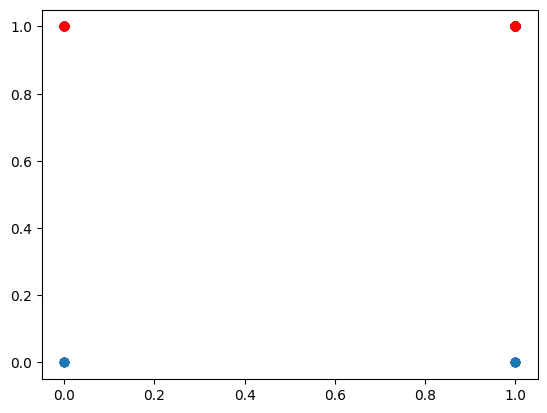

In [ ]:
plt.scatter(X_Lg_T.values[:,0],Y_Lg_T)
plt.scatter(X_Lg_T.values[:,0],Y_predic,color='red')
plt.show()

In [ ]:
precision = cross_val_score(sgd_clf, X_Lg_T, Y_Lg_T, cv=10, scoring="precision")
accuracy = cross_val_score(sgd_clf, X_Lg_T, Y_Lg_T, cv=10, scoring="accuracy")
recall = cross_val_score(sgd_clf, X_Lg_T, Y_Lg_T, cv=10, scoring="recall")
f1 = cross_val_score(sgd_clf, X_Lg_T, Y_Lg_T, cv=10, scoring="f1")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local

In [ ]:
print("Resultados del modelo SGDC de Scikit Learn")
print(" Precision:",round(precision.mean(),3))
print(" Accuracy: ",round(accuracy.mean(),3))
print(" Recall:   ",round(recall.mean(),3))
print(" F1:       ",round(f1.mean(),3))

Resultados del modelo SGDC de Scikit Learn
 Precision: 0.838
 Accuracy:  0.839
 Recall:    1.0
 F1:        0.911


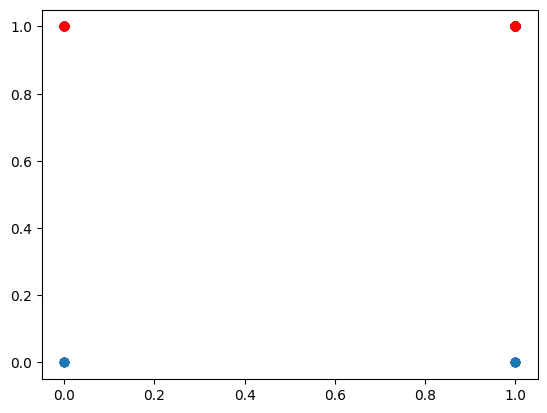

In [ ]:
plt.scatter(X_Lg_T.values[:,0],Y_Lg_T)
plt.scatter(X_Lg_T.values[:,0],Y_predic,color='red')
plt.show()

In [ ]:
print(Res_Log_RegLog,"","Modelo log")
print(Res_Log_skLog,"","Modelo log de skl")
print(Res_Log_skSGDC,"","Modelo SGDC")


0.17204301075268819  Modelo log
0.27956989247311825  Modelo log de skl
0.27956989247311825  Modelo SGDC
